In [21]:
import composeml as cp
import featuretools as ft
import pandas as pd

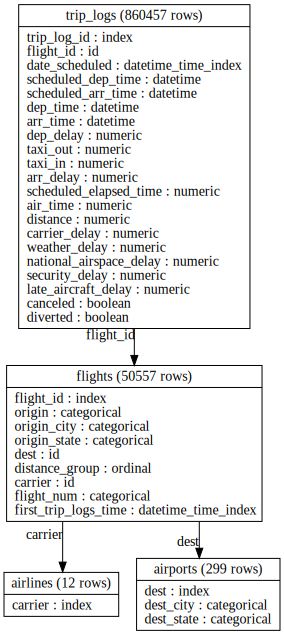

In [2]:
es = ft.demo.load_flight()
es.plot()

In [88]:
def flight_delay(df):
    value = df.arr_time.sub(df.scheduled_arr_time)
    value = value.abs().mean()
    return value

In [118]:
lm = cp.LabelMaker(
    target_entity='flight_id',
    labeling_function=flight_delay,
    time_index='date_scheduled',
    window_size='1w',
)

In [136]:
lt = lm.search(
    es['trip_logs'].df,
    num_examples_per_instance=3,
    minimum_data='2016-10',
    verbose=True,
)

Elapsed: 02:52 | Remaining: 00:00 | Progress: 100%|██████████| flight_id: 151671/151671 


In [223]:
labels = ['0 - 10 mins', '10 - 20 mins', '20 - 120 mins']

bins = [0, 10, 20, 120]
bins = map('{}min'.format, bins)
bins = list(map(pd.Timedelta, bins))

bins

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:10:00'),
 Timedelta('0 days 00:20:00'),
 Timedelta('0 days 02:00:00')]

In [230]:
lt_bin = lt.bin(bins=bins, labels=labels)

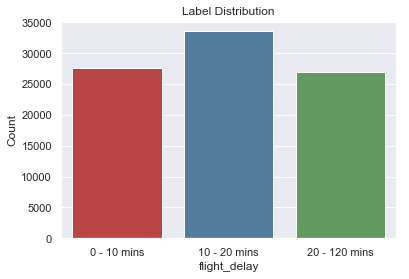

In [232]:
lt_bin.plot.dist();

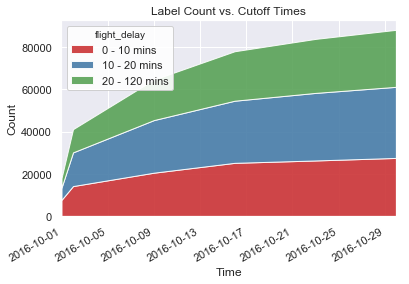

In [233]:
lt_bin.plot.count_by_time();